In this notebook we will dive into the ratings. 
So the question of this notebook is:

What do reviews reveal for the services that are provided?

Are there any associations or biases between ratings and some key characteristics ?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)


df_list = pd.read_csv(r'C:\Users\5570 i5\Desktop\Udacity\Project 1\df_list.csv')
df_list.head()

,id,host_response_time,reviews_per_month,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,guests_included,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,host_is_superhost_bool,host_has_profile_pic_bool,host_identity_verified_bool,is_location_exact_bool,has_availability_bool,requires_license_bool,instant_bookable_bool,require_guest_profile_picture_bool,require_guest_phone_verification_bool,host_acceptance_rate_bool,price_dollar,weekly_price_dollar,monthly_price_dollar,security_deposit_dollar,cleaning_fee_dollar,extra_people_dollar,host_response_rate_perc
0,241032,within a few hours,4.07,Queen Anne,3.0,3.0,Queen Anne,"Seattle, WA",47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,2,1,365,4 weeks ago,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,2,False,True,True,True,True,False,False,False,False,True,85.0,NaN,NaN,NaN,NaN,NaN,96.0
1,953595,within an hour,1.48,Queen Anne,6.0,6.0,Queen Anne,"Seattle, WA",47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,1,2,90,today,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,6,True,True,True,True,True,False,False,True,True,True,150.0,1000.0,3000.0,100.0,40.0,40.0,98.0
2,3308979,within a few hours,1.15,Queen Anne,2.0,2.0,Queen Anne,"Seattle, WA",47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10,4,30,5 weeks ago,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,2,False,True,True,True,True,False,False,False,False,True,975.0,NaN,NaN,1000.0,300.0,300.0,67.0
3,7421966,NaN,NaN,Queen Anne,1.0,1.0,Queen Anne,"Seattle, WA",47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,1,1,1125,6 months ago,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,False,True,True,True,True,False,False,False,False,False,100.0,650.0,2300.0,NaN,NaN,NaN,NaN
4,278830,within an hour,0.89,Queen Anne,2.0,2.0,Queen Anne,"Seattle, WA",47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,6,1,1125,7 weeks ago,30,60,90,365,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,1,False,True,True,True,True,False,False,False,False,False,450.0,NaN,NaN,700.0,125.0,125.0,100.0


We will draw a histogram in order to check how the review_score_rating is distributed, in order to take a first look about the values of the core ratings indicator which shows the level of satisfaction for Airbnb customers, by using the services for Seattle 

C:\python\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\python\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


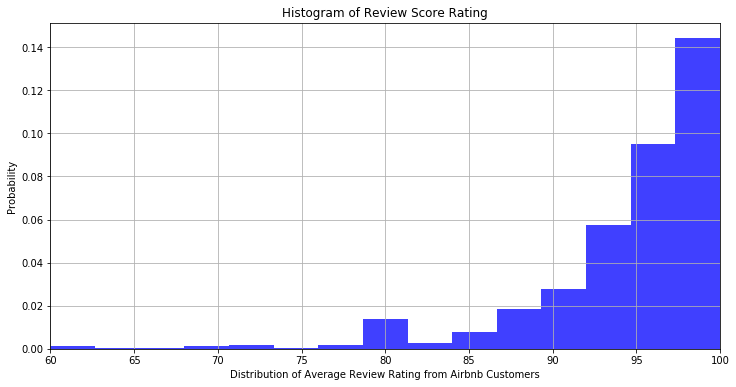

In [2]:
plt.figure(figsize=(12,6))

plt.hist(df_list.review_scores_rating, 30, density=True, facecolor='b', alpha=0.75)


plt.xlabel('Distribution of Average Review Rating from Airbnb Customers')
plt.ylabel('Probability')
plt.title('Histogram of Review Score Rating')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(60, 100)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

Distribution of the average rating score is left skewed, because customers seem to be quite satified from the services are offered to them. We observe very few ratings below 80%.

As a next step, we will try to identify if there some reasons that make customers to give a perfect score, in order to identify anything related with Seattle Airbnp market where further improvement can be done, or this deviance from the perfect score can be explained by a/some driver/s 

Initially we will try to identify how several specialized scores  impact on the review_scores_rating, which is 
the average rating that is given to each property by guests. 
First of all we will explore create scatter plot for each of:


    1) review_scores_accuracy
    2) review_scores_cleanliness
    3) review_scores_checkin
    4) review_scores_communication
    5) review_scores_location
    6) review_scores_value
    
    
with review_scores_rating:

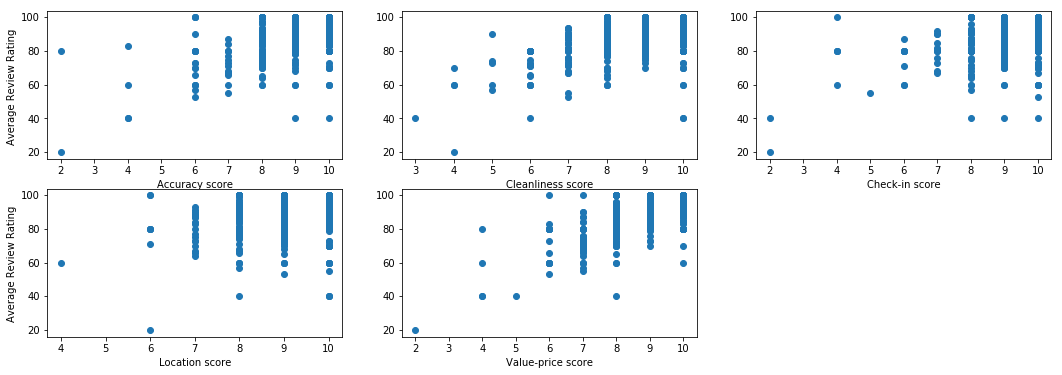

In [3]:
plt.figure(figsize=(18,6))

plt.subplot(2, 3, 1)
plt.scatter(df_list.review_scores_accuracy,df_list.review_scores_rating)
plt.xlabel("Accuracy score")
plt.ylabel('Average Review Rating ')

plt.subplot(2, 3, 2)
plt.scatter(df_list.review_scores_cleanliness,df_list.review_scores_rating)
plt.xlabel("Cleanliness score")

plt.subplot(2, 3, 3)
plt.scatter(df_list.review_scores_checkin,df_list.review_scores_rating)
plt.xlabel("Check-in score")

plt.subplot(2, 3, 4)
plt.scatter(df_list.review_scores_location,df_list.review_scores_rating)
plt.xlabel("Location score")
plt.ylabel('Average Review Rating ')


plt.subplot(2, 3, 5)
plt.scatter(df_list.review_scores_value,df_list.review_scores_rating)
plt.xlabel("Value-price score")

plt.show()

From the scatter plots above we cannot derive any specific conclusion from specific ratings. Overall rating seem to have the same dispersion of its values in comparison with every specified rating. 

So these individual rating do not affect the final rating that customers give for the services they had been offered.

An interesting thing explore would be if the customers are biased and tend to rate higher hosts who have built a good reputation 

So, is there any association in 'Overall review score' from 'Host is a superhost'?

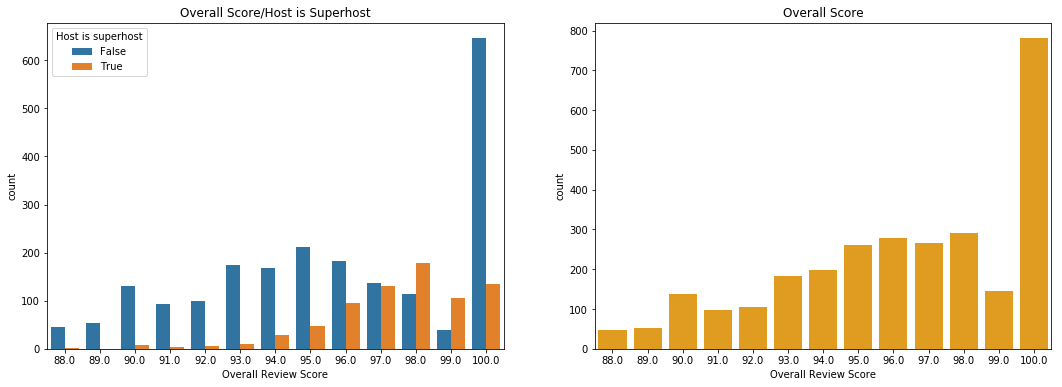

In [4]:
fig, axs = plt.subplots(ncols=2,figsize=(18,6))

sns.countplot(x=df_list.review_scores_rating[df_list.review_scores_rating>87] ,
                 hue=df_list.host_is_superhost_bool
                 ,ax=axs[0]).legend(title="Host is superhost",loc='upper left')
axs[0].set_title('Overall Score/Host is Superhost')
axs[0].set(xlabel="Overall Review Score")

sns.countplot(x=df_list.review_scores_rating[df_list.review_scores_rating>87] , color='orange'
                  ,ax=axs[1]).set_title('Overall Score')
axs[1].set(xlabel="Overall Review Score")
plt.show()

The above plots illustate very clear that the general rating behaviour of guests can be described very well in cases where host is NOT a superhost. Blue columns in the left plot are very similarly distributed with the columns in the right plot.

But for the cases where host is superhoset, we can observe guests' tendency to give high ratings

Next step is to explore some individual ratings in order to understand better the reasons of how people rate Airbnb services in Seattle

Cleanliness Rating

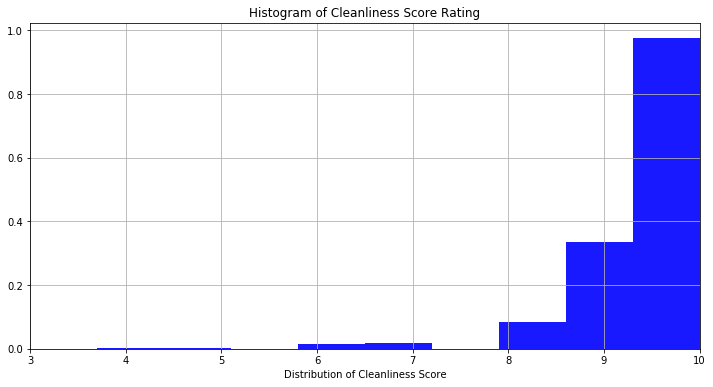

In [5]:
plt.figure(figsize=(12,6))

plt.hist(df_list.review_scores_cleanliness, 10, density=True, facecolor='b', alpha=0.9)


plt.xlabel('Distribution of Cleanliness Score')
plt.title('Histogram of Cleanliness Score Rating')
plt.xlim(3, 10)
plt.grid(True)
plt.show()

The above histogram indicates very strong left skewness showing that generally the services that are offered in Seattle, have to do with clean spaces which is highly appreciated by the customers.

Ratings are quite high, with very few below 8.

Is there any association between 'Cleanliness Score' and 'Cost for Cleaning'?

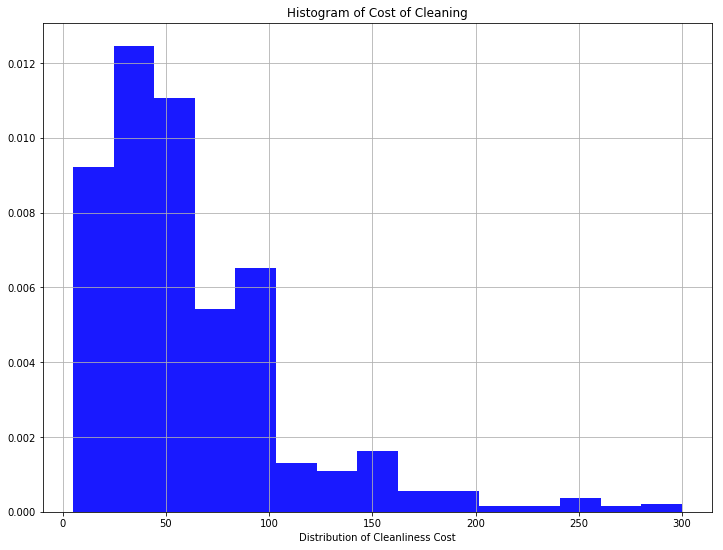

In [6]:
plt.figure(figsize=(12,9))

plt.hist(df_list.cleaning_fee_dollar, 15, density=True, facecolor='b', alpha=0.9)


plt.xlabel('Distribution of Cleanliness Cost')
plt.title('Histogram of Cost of Cleaning')
#plt.xlim(3, 10)
plt.grid(True)
plt.show()

Distribution of cost of cleaning services is right skewed. Prices tend to be less that $150. With few cases to be more expensive than this amount. 

Let's see now if customers are biased towards high prices, being stricter when cleaning services get more expensive.

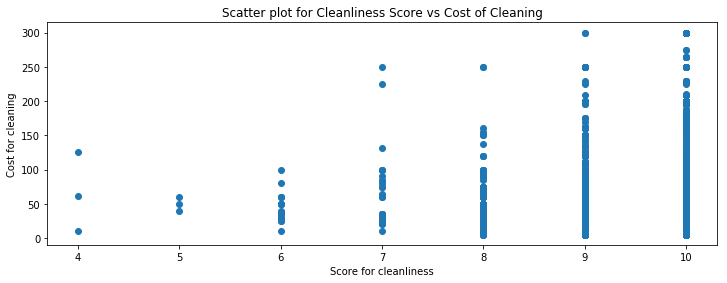

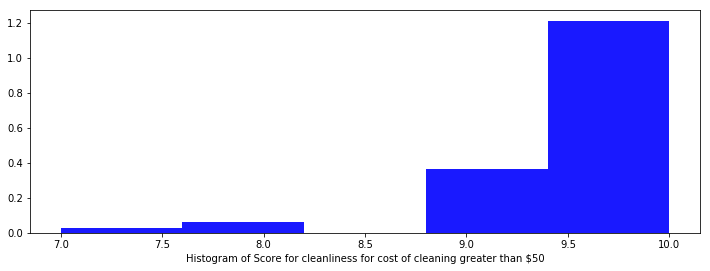

In [7]:
plt.figure(figsize=(12,9))

plt.subplot(2, 1, 1)
plt.scatter(df_list.review_scores_cleanliness,df_list.cleaning_fee_dollar)
plt.xlabel("Score for cleanliness")
plt.ylabel('Cost for cleaning')
plt.title('Scatter plot for Cleanliness Score vs Cost of Cleaning')
plt.show()

plt.figure(figsize=(12,9))

plt.subplot(2, 1, 2)
plt.hist(df_list.review_scores_cleanliness[df_list.cleaning_fee_dollar>150], 5, density=True, facecolor='b', alpha=0.9)
plt.xlabel("Histogram of Score for cleanliness for cost of cleaning greater than $50")
plt.show()

The above graphs indicates that there is no bias in customers' ratings regarding the cost for cleaning.

Low scores (below 6) are in the ranges of cost for the vast majority of the services (<$150) and they are uniformly spread for costs lower than $150. 

On top of that, scores for more expensive cleaning services ($150) seem to follow the same distribution as scores for all cases

The above analysis indicate that customers judge fairly the services are offered to them regarding cleaning and not towards the cost for that service

Accuracy score

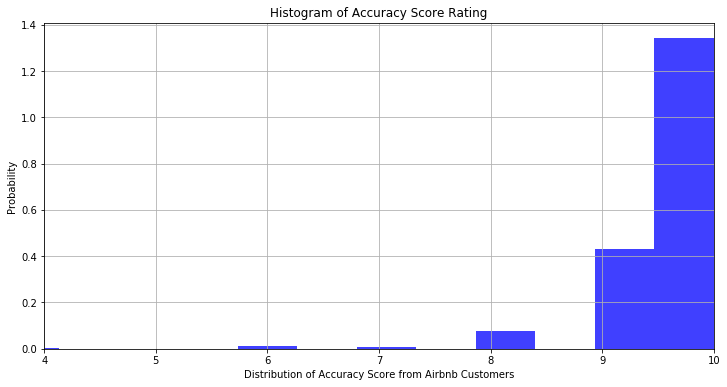

In [8]:
plt.figure(figsize=(12,6))

plt.hist(df_list.review_scores_accuracy, 15, density=True, facecolor='b', alpha=0.75)

plt.xlabel('Distribution of Accuracy Score from Airbnb Customers')
plt.ylabel('Probability')
plt.title('Histogram of Accuracy Score Rating')
plt.xlim(4, 10)
plt.grid(True)
plt.show()

Accuracy Score shows very strong left skewness. Generally, Accuracy score is very high.

Are there any association between 'Accuracy score' and:

1) information if the host's identity is verified and 

2) information if the location is the same as in the description

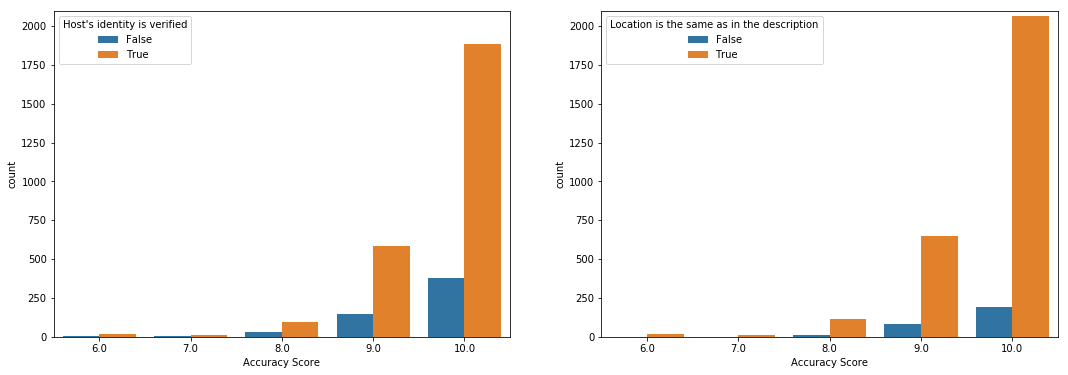

In [9]:
fig, axs = plt.subplots(ncols=2,figsize=(18,6))

sns.countplot(x=df_list.review_scores_accuracy[df_list.review_scores_accuracy>5] ,
                 hue=df_list.host_identity_verified_bool,
                 ax=axs[0]).legend(title="Host's identity is verified",loc='upper left')
axs[0].set(xlabel="Accuracy Score")

sns.countplot(x=df_list.review_scores_accuracy[df_list.review_scores_accuracy>5] ,
                 hue=df_list.is_location_exact_bool,
                 ax=axs[1]).legend(title="Location is the same as in the description",loc='upper left')
axs[1].set(xlabel="Accuracy Score")



axs[0].set(ylim=(0, 2100))
axs[1].set(ylim=(0, 2100))
plt.show()

We can see that Accuracy score can be associated with verification of host's identity and the precision in location.

On top of that, we can see that the accuracy in location has slightly more impact on Accuracy Score

Score for Communication

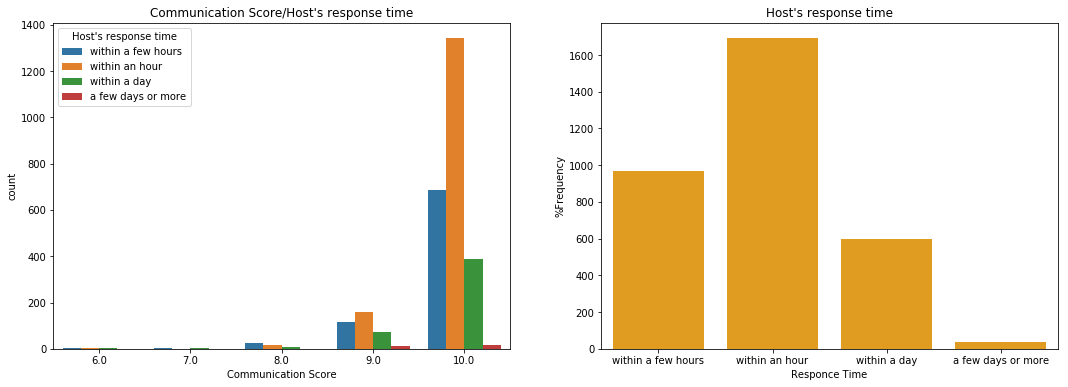

In [10]:
fig, axs = plt.subplots(ncols=2,figsize=(18,6))

sns.countplot(x=df_list.review_scores_communication[df_list.review_scores_communication>5] ,
                 hue=df_list.host_response_time
                 ,ax=axs[0]).legend(title="Host's response time",loc='upper left')
axs[0].set_title("Communication Score/Host's response time")
axs[0].set(xlabel="Communication Score")

sns.countplot(x=df_list.host_response_time , color='orange'
                  ,ax=axs[1]).set_title("Host's response time")
axs[1].set(xlabel="Responce Time",ylabel="%Frequency")
plt.show()

Previous graphs confirms what seemed to obvious. Quick response times by the hosts impacts on communication score. 